In [1]:
%pylab inline

import pandas as pd
import pickle
import matplotlib.dates as md
import statsmodels.api as sm
import scipy.stats as dists
import requests

from scipy.misc import factorial
from scipy.optimize import minimize

tableau = pickle.load(open('tableau.colors', 'rb'))

rcParams['figure.figsize'] = (10,8)
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler('color', tableau)

xfmt = md.DateFormatter('%H:%M:%S')

Populating the interactive namespace from numpy and matplotlib


In [20]:
r = requests.get('https://deribit.com/api/v1/public/getlasttrades?instrument=BTC-21OCT16&count=40') 
data = r.json()['result'][::-1]

In [21]:
df = pd.DataFrame(columns=['t', 'sd', 'sz', 'px', 'idx'])

df['t']   = list(map(lambda trade: pd.to_datetime(1e6*trade['timeStamp']), data))
df['sd']  = list(map(lambda trade: trade['direction'][0], data))
df['sz']  = list(map(lambda trade: trade['quantity'], data))
df['px']  = list(map(lambda trade: trade['price'], data))
df['idx'] = list(map(lambda trade: trade['indexPrice'], data)) 

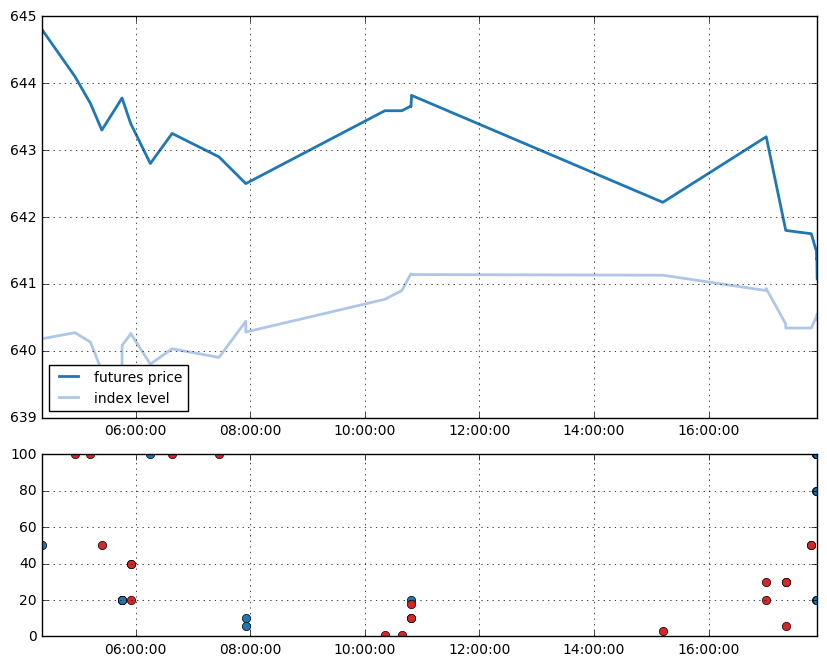

In [22]:
ax = []
ax.append(subplot2grid((3,1),(0,0), rowspan=2))
ax.append(subplot2grid((3,1),(2,0)))

ax[0].plot(df.t, df.px, lw=2, label='futures price')
ax[0].plot(df.t, df.idx, lw=2, label='index level')
ax[1].plot(df.loc[df.sd == 'b'].t, df.sz.loc[df.sd == 'b'], 'o', c=tableau[0])
ax[1].plot(df.loc[df.sd == 's'].t, df.sz.loc[df.sd == 's'], 'o', c=tableau[6])
#ax[1].plot(df.t, df.px - df.idx, lw=2)

ax[0].xaxis.set_major_formatter(xfmt)
ax[0].yaxis.get_major_formatter().set_useOffset(False)
ax[0].legend(loc='lower left', fontsize=10)
ax[1].xaxis.set_major_formatter(xfmt)